In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df=pd.read_csv(r'D:\scores_data.csv')

In [44]:
#Preprocessing:Convert 'Score' string (e.g.,"6/7") to a numeric value
df['Score_Value']=df['Score'].str.split('/').str[0].astype(int)

In [45]:
#1.Descriptive Statistics
print("Summary Statistics:")
print(df['Score_Value'].describe())

Summary Statistics:
count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score_Value, dtype: float64


In [47]:
#2.Batch-wise Performance Analysis
batch_stats=df.groupby('Batch')['Score_Value'].agg(['mean','count','median']).reset_index()
batch_stats=batch_stats.sort_values(by='mean',ascending=False)
print("\nBatch-wise Performance:")
print(batch_stats)


Batch-wise Performance:
        Batch      mean  count  median
2  AI_ELITE_7  5.056604     53     5.0
1  AI_ELITE_6  4.229167     48     4.0
0  AI_ELITE_4  3.791667     48     4.0


In [48]:
#3.Data Visualization
sns.set(style="whitegrid")

C:\Users\sindh\AppData\Local\Temp\ipykernel_5076\1517718833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score_Value',data=df,palette='viridis')


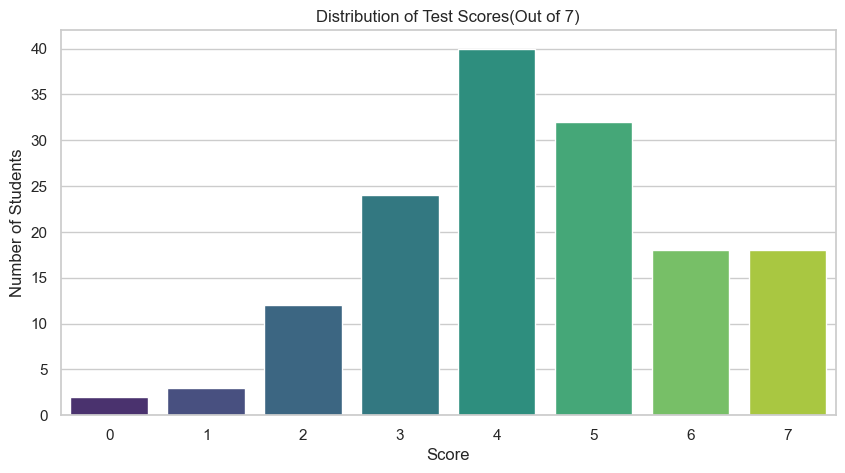

In [49]:
#Visualization 1:Distribution of Scores
plt.figure(figsize=(10,5))
sns.countplot(x='Score_Value',data=df,palette='viridis')
plt.title('Distribution of Test Scores(Out of 7)')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.savefig('score_distribution.png')

C:\Users\sindh\AppData\Local\Temp\ipykernel_5076\2004145227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean',y='Batch',data=batch_stats,palette='coolwarm')


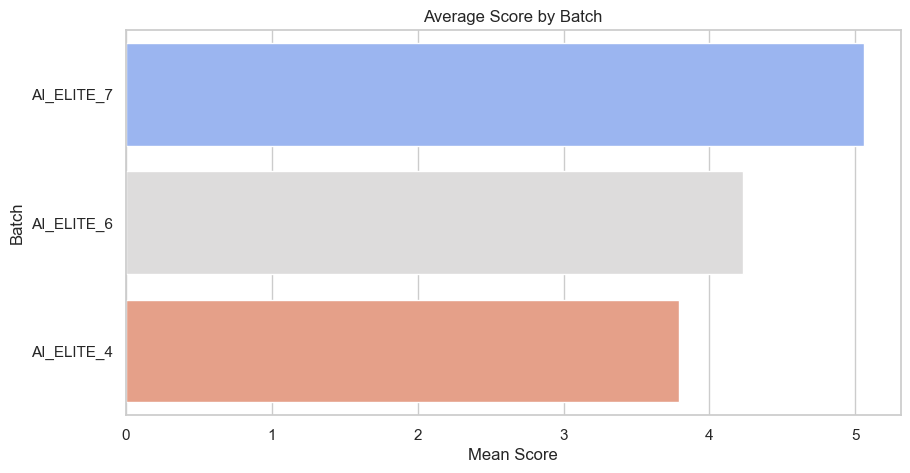

In [50]:
#Visualization 2:Average Score per Batch
plt.figure(figsize=(10,5))
sns.barplot(x='mean',y='Batch',data=batch_stats,palette='coolwarm')
plt.title('Average Score by Batch')
plt.xlabel('Mean Score')
plt.ylabel('Batch')
plt.savefig('average_score_by_batch.png')